In [1]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

Matplotlib is building the font cache; this may take a moment.


In [2]:
input_files = Path('/global/project/projectdirs/desi/users/cramirez/QSO_clustering_analysis/input_files')

# Nz files

Catalog taken from the measurements of Everest.

In [ ]:
nz_file = input_files / '10x_DESI.txt'
assert nz_file.is_file()

In [27]:
z, dndz = np.loadtxt(nz_file, unpack=True)

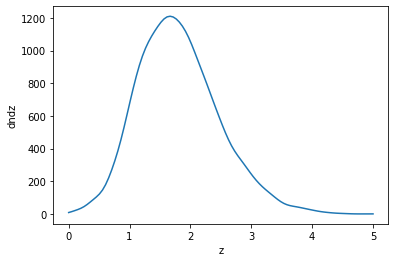

In [18]:
fig, ax = plt.subplots()

ax.plot(z, dndz)
ax.set_xlabel('z')
ax.set_ylabel('dndz');

This input file should be in CoLoRe format. That means:
- dndz exactly means dN(z)/dz*dOmega
- Its units are deg^-2

In [19]:
dz = np.diff(z)
assert np.allclose(dz, dz[0]*np.ones_like(dz))

N = dndz*dz[0]

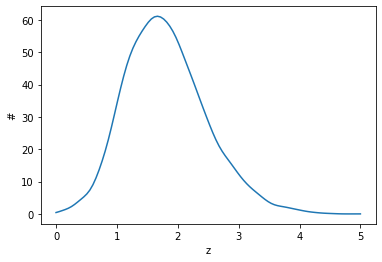

In [20]:
fig, ax = plt.subplots()

ax.plot(z, N)
ax.set_xlabel('z')
ax.set_ylabel('#');

The total number of QSOs according to James is 118/sq dg

In [21]:
def total_number(zmax, zmin=0):
    dndz_interp = interp1d(z, dndz)
    return quad(dndz_interp, zmin, zmax)

In [23]:
total_number(zmin=2.1, zmax=5) #CoLoRe was set to zmax=3.79

<ipython-input-21-40279572d01b>:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return quad(dndz_interp, zmin, zmax)


(600.2070210347088, 0.024721285543359055)

____

Catalog taken from the slack channel high-3x2

In [39]:
in_file = Path('/global/cfs/cdirs/desi/survey/catalogs/SV3/LSS/everest/LSScats/2.1/QSO_nz.dat')

In [40]:
z, _, _, _, N, _ = np.loadtxt(in_file, unpack=True)

In [41]:
from scipy import ndimage
from scipy.interpolate import interp1d

In [42]:
sigma = 3
N_smoothed = ndimage.gaussian_filter1d(N, sigma)

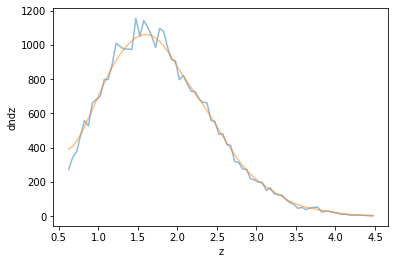

In [43]:
fig, ax = plt.subplots()

ax.plot(z, N, alpha=0.5)
ax.plot(z, N_smoothed, alpha=0.5)
ax.set_xlabel('z')
ax.set_ylabel('dndz');

In [44]:
nz = interp1d(z, N_smoothed)

In [46]:
density_integral = quad(nz, 2.1, z[-1])[0]
density_factor = 600 / density_integral

dndz = N_smoothed*density_factor

<ipython-input-46-2661ed2695b3>:1: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  density_integral = quad(nz, 2.1, z[-1])[0]


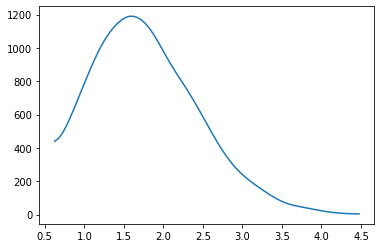

In [48]:
fig, ax = plt.subplots()

ax.plot(z, dndz)

In [55]:
np.savetxt('/global/project/projectdirs/desi/users/cramirez/QSO_clustering_analysis/input_files/high_3x2_600.txt', np.asarray((z, dndz)).transpose())

In [56]:
import os
os.environ['sc']

'/global/cscratch1/sd/cramirez'